In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
%matplotlib inline

In [3]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
gender_submission = pd.read_csv("gender_submission.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
gender_submission.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [9]:
train.groupby("Sex").count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [10]:
train.groupby("Sex")["Age"].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [11]:
train.groupby("Survived").count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [12]:
train.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [13]:
train["Age"].mean()

np.float64(29.69911764705882)

In [14]:
train["Age"].median()

28.0

In [15]:
test.groupby("Sex").count()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,152,152,152,127,152,152,152,152,44,152
male,266,266,266,205,266,266,266,265,47,266


In [16]:
test.groupby("Sex")["Age"].mean()

Sex
female    30.272362
male      30.272732
Name: Age, dtype: float64

In [17]:
test.groupby("Pclass").count()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,
1,107,107,107,98,107,107,107,107,80,107
2,93,93,93,88,93,93,93,93,7,93
3,218,218,218,146,218,218,218,217,4,218


In [18]:
test.groupby("Pclass")["Fare"].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [19]:
test.groupby("Pclass")["Fare"].median()

Pclass
1    60.0000
2    15.7500
3     7.8958
Name: Fare, dtype: float64

In [20]:
gender_submission.groupby("Survived").size()

Survived
0    266
1    152
dtype: int64

In [21]:
gender_submission["Survived"].mean()

np.float64(0.36363636363636365)

In [22]:
gender_submission["Survived"].median()

0.0

In [23]:
gender_submission["Survived"].mode()

0    0
Name: Survived, dtype: int64

In [24]:
freq_table = train.groupby(['Sex']).size().reset_index(name='Count')
freq_table

,Sex,Count
0,female,314
1,male,577


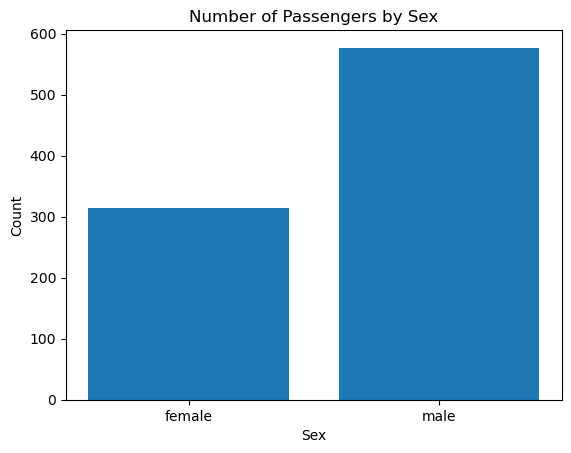

In [25]:
plt.bar(freq_table['Sex'], freq_table['Count'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Number of Passengers by Sex')
plt.show()

In [26]:
freq_table = train.groupby(['Pclass']).size().reset_index(name='Count')
freq_table

,Pclass,Count
0,1,216
1,2,184
2,3,491


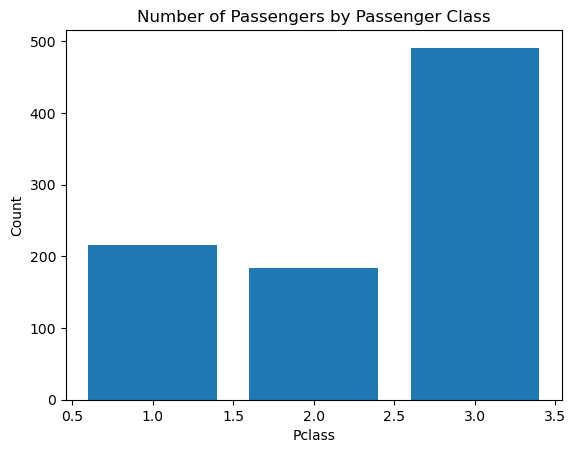

In [27]:
plt.bar(freq_table['Pclass'], freq_table['Count'])
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Number of Passengers by Passenger Class')
plt.show()

In [28]:
freq_table_test = test.groupby(['Pclass']).size().reset_index(name='Count')
freq_table_test

,Pclass,Count
0,1,107
1,2,93
2,3,218


In [29]:
freq_table_gender = gender_submission.groupby(['Survived']).size().reset_index(name='Count')
freq_table_gender

,Survived,Count
0,0,266
1,1,152


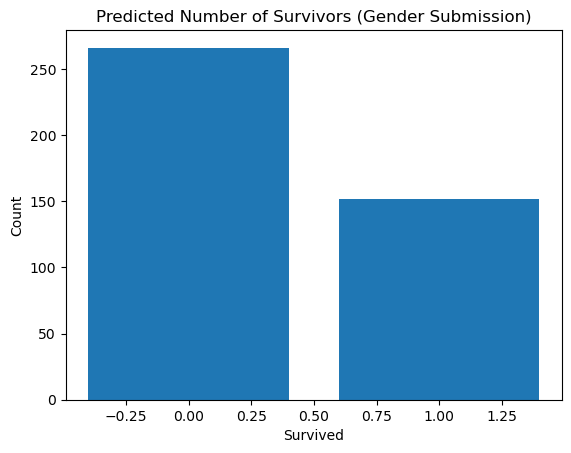

In [30]:
plt.bar(freq_table_gender['Survived'], freq_table_gender['Count'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Predicted Number of Survivors (Gender Submission)')
plt.show()

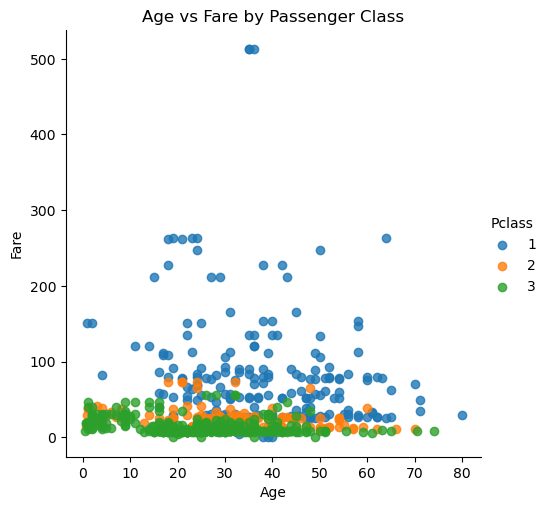

In [31]:
sns.lmplot(x='Age', y='Fare', hue='Pclass', fit_reg=False, data=train)
plt.title('Age vs Fare by Passenger Class')
plt.show()

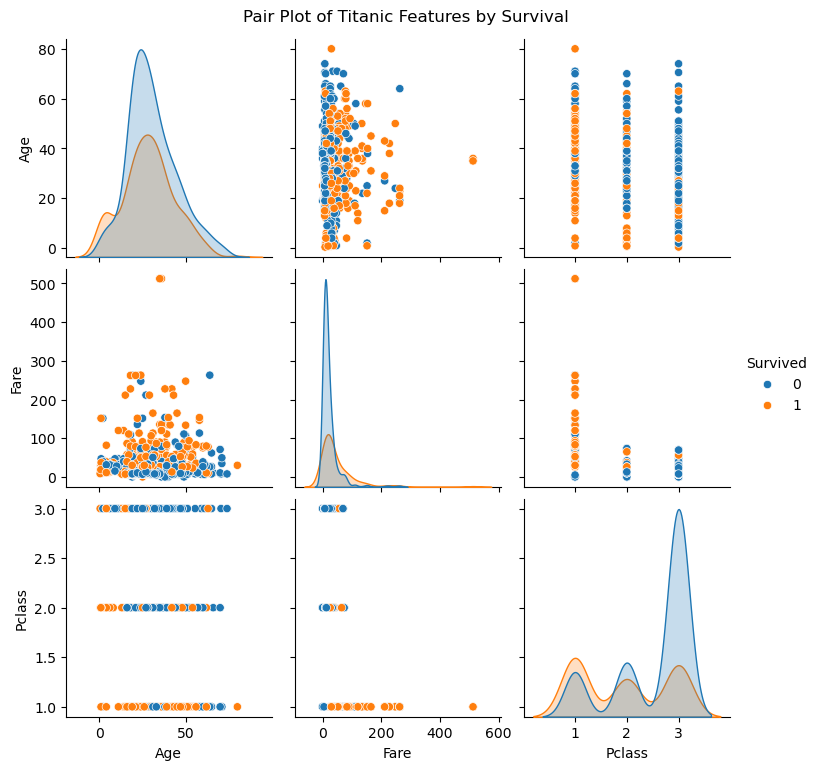

In [32]:
sns.pairplot(data=train, vars=['Age', 'Fare', 'Pclass'], hue='Survived')
plt.suptitle('Pair Plot of Titanic Features by Survival', y=1.02)
plt.show()

In [33]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
train['Age']=train['Age'].fillna(train['Age'].mean())

In [35]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [36]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [37]:
sns.heatmap(test.isnull(),cbar=True).set_title('Missing values heatmap')

Text(0.5, 1.0, 'Missing values heatmap')

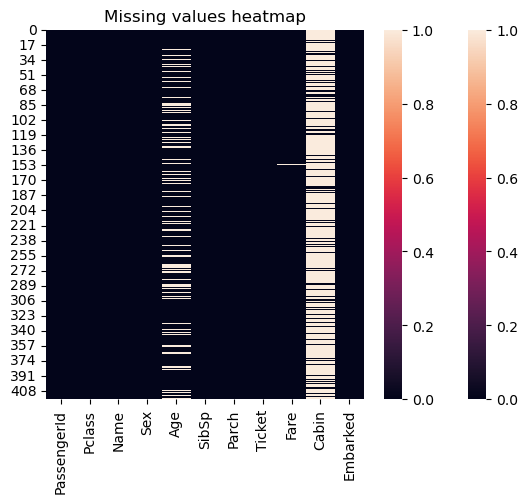

In [38]:
sns.heatmap(test.isnull(), cbar=True)
plt.title('Missing values heatmap')
plt.show()

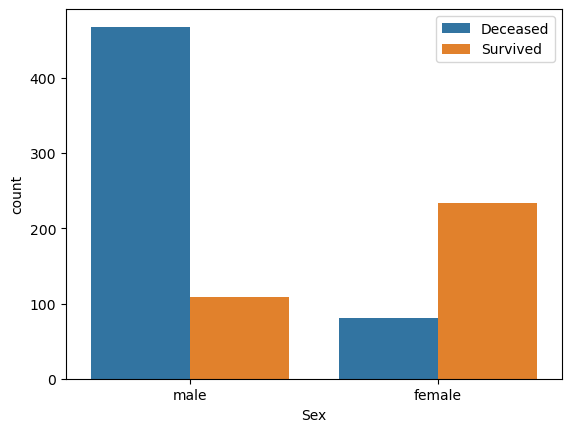

In [39]:
sns.countplot(x='Sex',hue='Survived',data=train)
plt.legend(['Deceased', 'Survived'])
plt.show()

## DATA PROCESSING

In [52]:
X = train.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Parch', 'Cabin','Survived'],axis = 1)
y = train['Survived']

In [53]:
X

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,male,22.000000,1,7.2500,S
1,1,female,38.000000,1,71.2833,C
2,3,female,26.000000,0,7.9250,S
3,1,female,35.000000,1,53.1000,S
4,3,male,35.000000,0,8.0500,S
...,...,...,...,...,...,...
886,2,male,27.000000,0,13.0000,S
887,1,female,19.000000,0,30.0000,S
888,3,female,29.699118,1,23.4500,S
889,1,male,26.000000,0,30.0000,C


In [54]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [69]:
X.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace = True)

In [70]:
X

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,0,22.000000,1,7.2500,0.0
1,1,1,38.000000,1,71.2833,1.0
2,3,1,26.000000,0,7.9250,0.0
3,1,1,35.000000,1,53.1000,0.0
4,3,0,35.000000,0,8.0500,0.0
...,...,...,...,...,...,...
886,2,0,27.000000,0,13.0000,0.0
887,1,1,19.000000,0,30.0000,0.0
888,3,1,29.699118,1,23.4500,0.0
889,1,0,26.000000,0,30.0000,1.0


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
X.shape, X_train.shape, X_test.shape

((891, 6), (712, 6), (179, 6))

In [73]:
y.shape, y_train.shape,y_test.shape

((891,), (712,), (179,))

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

In [77]:
model = RandomForestClassifier(n_estimators=100,    
    random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [78]:
y_predict=model.predict(X_test)

In [79]:
y_predict

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [80]:
accuracy=accuracy_score(y_test,y_predict)

In [81]:
accuracy

0.8100558659217877

In [83]:
from sklearn import metrics

In [90]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()

In [92]:
y_test.value_counts()

Survived
0    105
1     74
Name: count, dtype: int64

In [95]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, y_predict)}")
print(f"Precision: {metrics.precision_score(y_test, y_predict)}")
print(f"Recall: {metrics.recall_score(y_test, y_predict)}")

True positives: 54
False positives: 14
True negatives: 91
False negatives: 20

Accuracy: 0.8100558659217877
Precision: 0.7941176470588235
Recall: 0.7297297297297297


In [96]:
from sklearn.metrics import accuracy_score, precision_score, f1_score,recall_score

accuracy = accuracy_score(y_test,y_predict)
precision = precision_score(y_test,y_predict,average = 'weighted')
recall = recall_score(y_test,y_predict,average = 'weighted')
f1 = f1_score(y_test,y_predict,average= 'weighted')

print('Accuracy : ',accuracy)
print('Precision : ',precision)
print('Recall :',recall)
print('F1 score:',f1)

Accuracy :  0.8100558659217877
Precision :  0.8091943405778437
Recall : 0.8100558659217877
F1 score: 0.8086810746540072


In [98]:
#training of data and checking libraries with more accuracy 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


#libraries used in dictionary format
models = {
    'Logistic Regression' : LogisticRegression(max_iter = 1000),
    'Naive Bayes' : GaussianNB(),
    'Support Vector Machine' : SVC(),
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Bagging' : BaggingClassifier(),
    'AdaBoost' : AdaBoostClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

#name = libraries/modulesnames, md = models dictionary and results will be assigned in items
for name,md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)

    print(f"{name} with accuracy : {accuracy_score(y_test,ypredict) * 100}")

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [99]:
cr = metrics.classification_report(y_test,y_predict,zero_division=0)
print(f'Classification Report:\n{cr}')

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [101]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

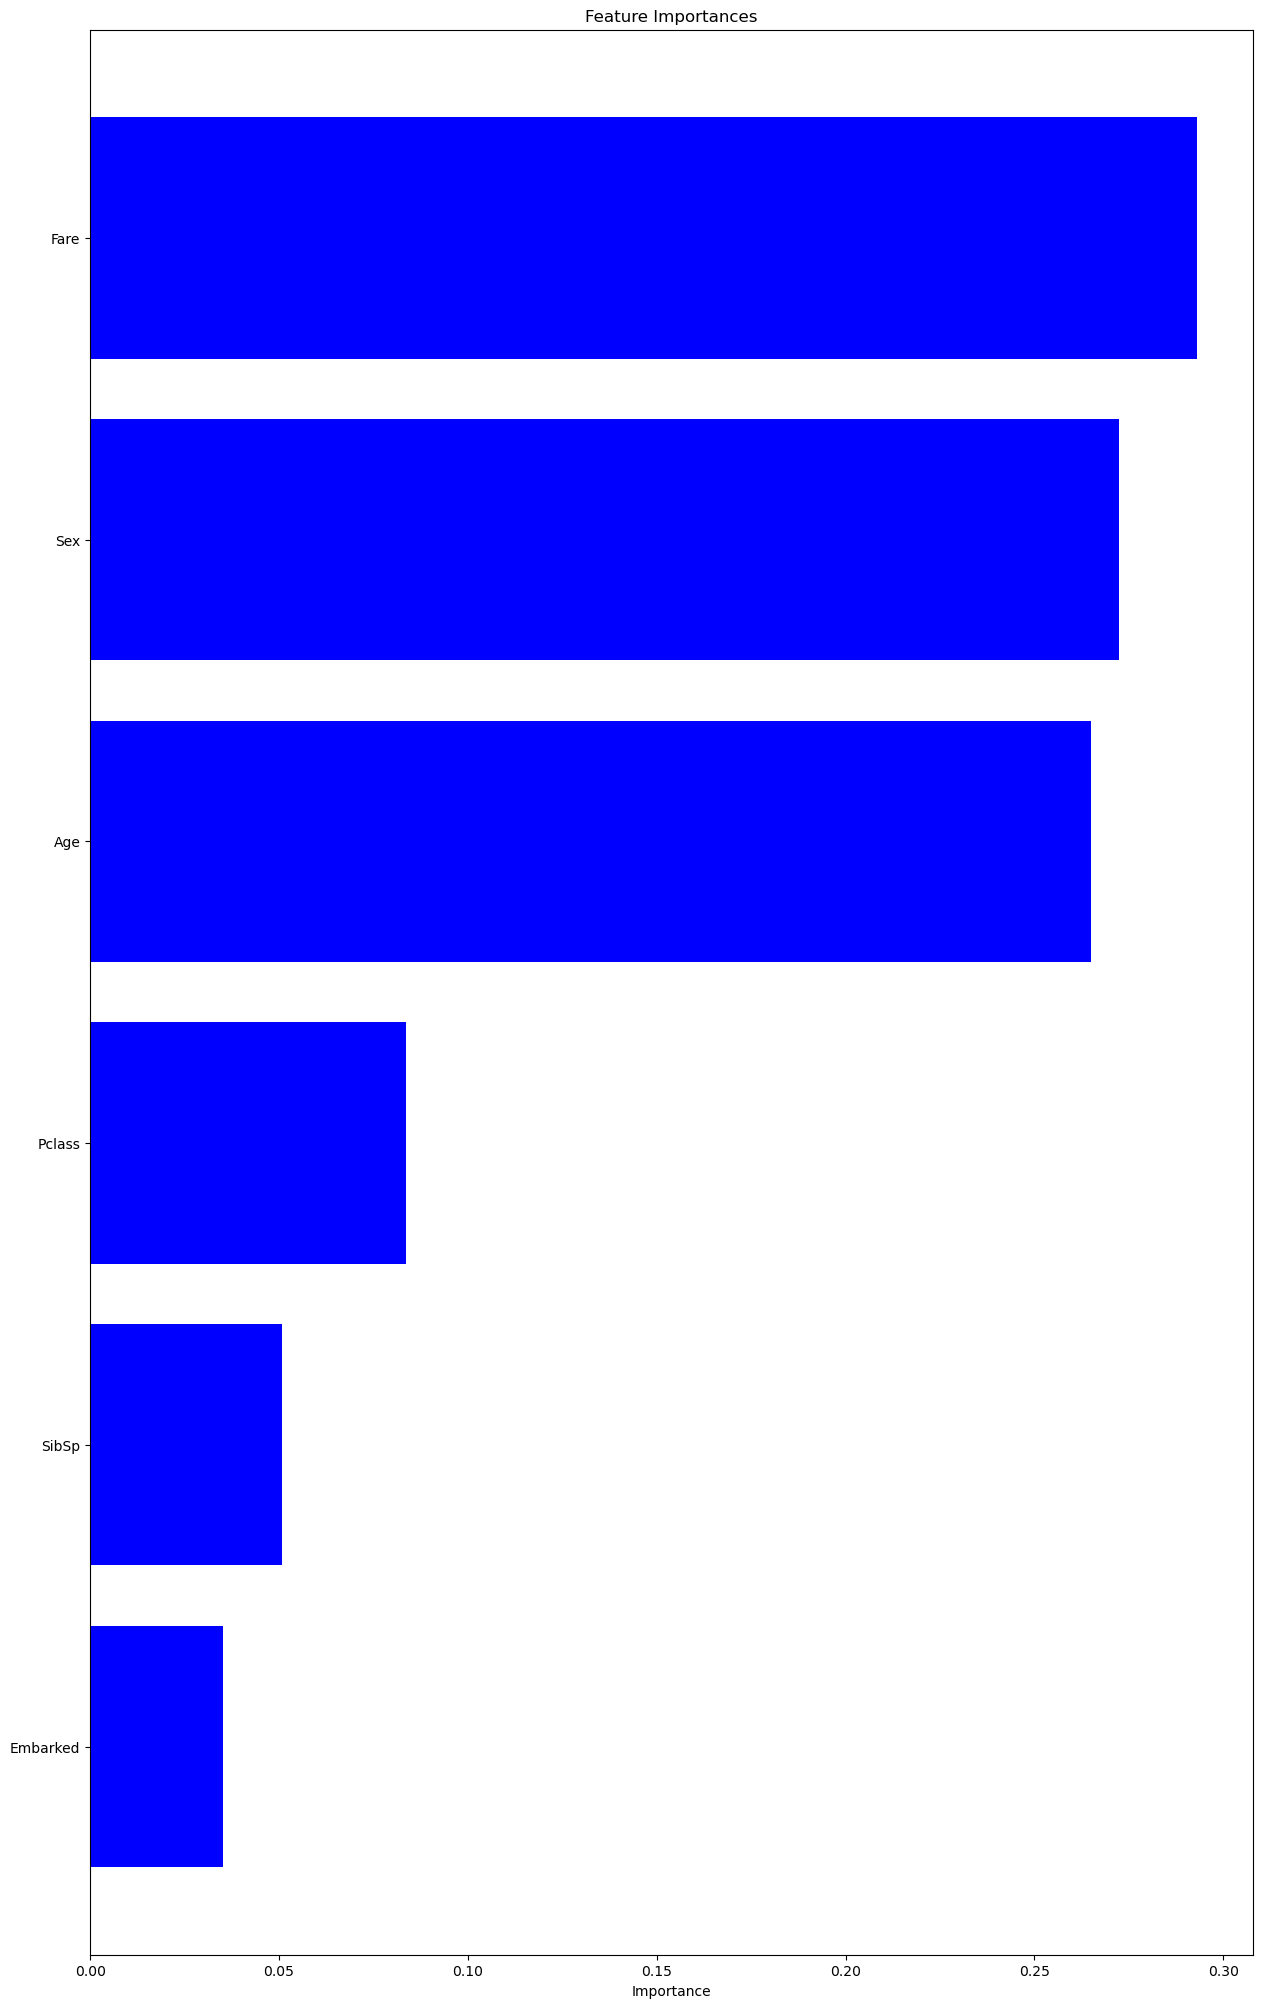

In [102]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [125]:
test.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace = True)

In [126]:
ids = test['PassengerId'] 
predictions = model.predict(test.drop(columns = ["PassengerId", "Name", "Ticket","Cabin", "Parch"], axis=1)) 

In [127]:
Predictions= model.predict(X_test)

In [130]:
Results=pd.DataFrame({'PassengerId': ids, 'Survived': predictions})
Results.to_csv('titanic.csv',index=False)

In [114]:
import pickle as pkl

pkl.dump(model, open('titanic-survival-prediction-model.pkl', 'wb'))

In [115]:
loaded_model = pkl.load(open('titanic-survival-prediction-model.pkl', 'rb'))

In [116]:
loaded_model

RandomForestClassifier(random_state=42)